In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import datetime as dt

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [4]:
# Understanding the data

covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [5]:
covid_df.columns

Index(['iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1153)

Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.

In [39]:
# Filter Covid Data for Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
# Remove unnecessary columns
utah_data = utah_data.drop(['iso2', 'iso3', 'code3', 'FIPS', 'Province_State', 'Country_Region',
                            'Lat', 'Long_', 'Combined_Key'], axis=1)
# Melt the data to a long format
utah_data = utah_data.melt(id_vars = "Admin2",
                           var_name = "Date",
                           value_name = "Cases")
# Rename the Admin2 column to County
utah_data = utah_data.rename(columns = {'Admin2': 'County'})
# Format the Date column using the datetime module
utah_data['Date'] = pd.to_datetime(utah_data['Date'], format = '%m/%d/%y')
utah_data['Date'] = utah_data['Date'].dt.strftime('%m/%Y')
utah_data.head()

,County,Date,Cases
0,Bear River,01/2020,0
1,Beaver,01/2020,0
2,Box Elder,01/2020,0
3,Cache,01/2020,0
4,Carbon,01/2020,0


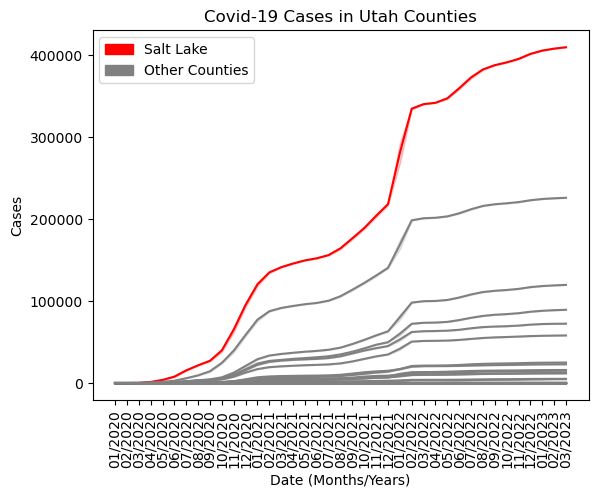

In [50]:
#1
"""
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
"""

# Create a pallete to identify a county of interest
county_colors = {county : "red" if county == "Salt Lake" else "grey" for county in utah_data['County'].unique()}

sns.lineplot(data = utah_data, x = "Date", y = "Cases", hue = "County", palette = county_colors)
plt.xlabel("Date (Months/Years)")
plt.ylabel("Cases")
plt.title("Covid-19 Cases in Utah Counties")
plt.xticks(rotation = 90)
ax = plt.gca()
handles = [mpatches.Patch(color = 'red', label = "Salt Lake"), mpatches.Patch(color = "grey", label = "Other Counties")]
ax.legend(handles = handles)
plt.show()





In [158]:
# Determine cumulative case leaders by county for Florida and Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
florida_data = covid_df[covid_df['Province_State'] == 'Florida']

# Remove unnecessary columns
utah_data = utah_data.drop(['iso2', 'iso3', 'code3', 'FIPS','Province_State', 'Country_Region',
                            'Lat', 'Long_', 'Combined_Key'], axis=1)
florida_data = florida_data.drop(['iso2', 'iso3', 'code3', 'FIPS', 'Province_State', 'Country_Region',
                                  'Lat', 'Long_', 'Combined_Key'], axis=1)

# Rename Admin2 column
utah_data = utah_data.rename(columns = {'Admin2': 'County'})
utah_data = utah_data.set_index("County", drop=True)
florida_data = florida_data.rename(columns = {'Admin2': 'County'})
florida_data = florida_data.set_index("County", drop = True)

utah_sum = utah_data.iloc[:, -1]
utah_sorted = utah_sum.sort_values(ascending = False)
print(utah_sorted.head())

florida_sum = florida_data.iloc[:, -1]

florida_sorted = florida_sum.sort_values(ascending = False)
print(florida_sorted.head())

# Salt Lake and Miami-Dade Counties are the leaders in their respective states






County
Salt Lake         410508
Utah              226280
Davis             120040
Weber-Morgan       89619
Southwest Utah     72559
Name: 3/9/23, dtype: int64
County
Miami-Dade      1552197
Broward          774980
Palm Beach       481679
Hillsborough     479640
Orange           475796
Name: 3/9/23, dtype: int64


In [81]:
# Calculate a cumulative difference between the two
question_two_data = covid_df[covid_df["Admin2"].isin(["Salt Lake", "Miami-Dade"])]
question_two_data = question_two_data.drop(['iso2', 'iso3', 'code3', 'FIPS','Province_State', 'Country_Region',
                            'Lat', 'Long_', 'Combined_Key'], axis=1)
question_two_data = question_two_data.rename(columns = {'Admin2': 'County'})
question_two_data = question_two_data.set_index("County", drop=True)
question_two_data.loc['Difference'] = question_two_data.loc['Miami-Dade'] - question_two_data.loc['Salt Lake']

question_two_data['County'] = question_two_data.index
question_two_data = question_two_data.melt(id_vars="County", var_name="Date", value_name="Cases")

question_two_data['Date'] = pd.to_datetime(question_two_data['Date'], format = '%m/%d/%y')
question_two_data['Date'] = question_two_data['Date'].dt.strftime('%m/%Y')
question_two_data.head()


,County,Date,Cases
0,Miami-Dade,01/2020,0
1,Salt Lake,01/2020,0
2,Difference,01/2020,0
3,Miami-Dade,01/2020,0
4,Salt Lake,01/2020,0


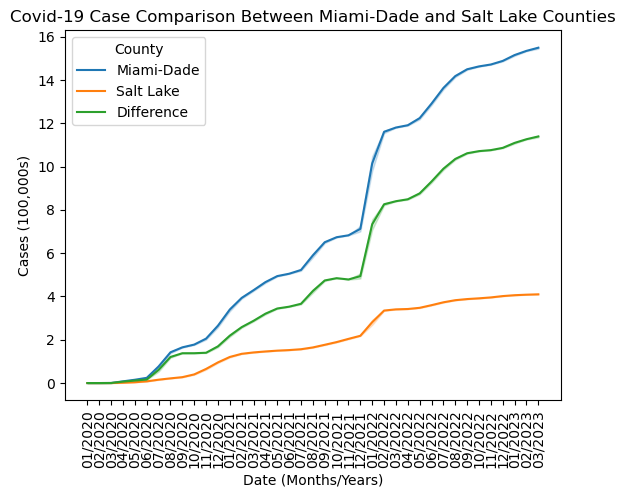

In [94]:
#2
"""
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
"""

def y_formatter(value, position):
    "return the value and tick position"
    return '%1.0f' % (value/100000)
    #return '%1.0f' % (value * 1e-5)

y_format = FuncFormatter(y_formatter)

sns.lineplot(data = question_two_data, x = "Date", y = "Cases", hue = "County")
plt.xlabel("Date (Months/Years)")
plt.ylabel("Cases (100,000s)")
plt.title("Covid-19 Case Comparison Between Miami-Dade and Salt Lake Counties")
plt.xticks(rotation = 90)
ax = plt.gca()
ax.yaxis.set_major_formatter(y_format)
plt.show()

In [118]:
# Grab Hillsborough County Data
hillsborough_data = covid_df[(covid_df['Admin2'] == 'Hillsborough') & (covid_df['Province_State'] == 'Florida')]
hillsborough_data = hillsborough_data.drop(['iso2', 'iso3', 'code3', 'FIPS','Province_State', 'Country_Region',
                            'Lat', 'Long_', 'Combined_Key'], axis = 1)
hillsborough_data = hillsborough_data.rename(columns = {'Admin2': 'County'})
hillsborough_data = hillsborough_data.melt(id_vars = "County", var_name = "Date", value_name="Cases")

# Calculate Daily Total
daily_total = []
for position,value in enumerate(hillsborough_data['Cases']):
    if position == 0:
        daily_total.append(value)
    else:
        daily_total.append(value - hillsborough_data['Cases'][position - 1])

hillsborough_data['Daily Total'] = daily_total
hillsborough_data['Date'] = pd.to_datetime(hillsborough_data['Date'], format = '%m/%d/%y')
hillsborough_data['Date'] = hillsborough_data['Date'].dt.strftime('%m/%Y')

1143
1143


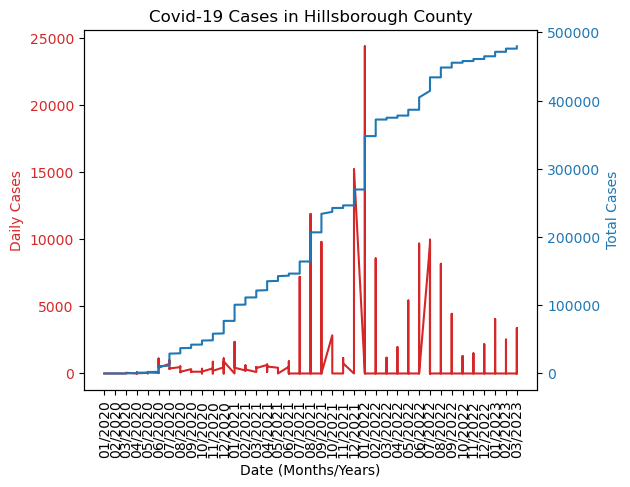

In [129]:
#3
#fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
#ax1.plot(t, data1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show() 
""" 
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
"""

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel("Date (Months/Years)")
ax1.set_ylabel("Daily Cases", color = color)
ax1.plot(hillsborough_data['Date'], hillsborough_data['Daily Total'], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.tick_params(axis = "x", rotation = 90)

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Total Cases", color = color)
ax2.plot(hillsborough_data['Date'], hillsborough_data['Cases'], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.title("Covid-19 Cases in Hillsborough County")
plt.show()



In [159]:
Delaware_data = covid_df[covid_df['Province_State'] == 'Delaware']
Delaware_data = Delaware_data.drop(['iso2', 'iso3', 'code3', 'FIPS','Province_State', 'Country_Region',
                            'Lat', 'Long_', 'Combined_Key'], axis=1)
Delaware_data = Delaware_data.rename(columns = {'Admin2': 'County'})
Delaware_data = Delaware_data.set_index("County", drop=True)
Delaware_data = Delaware_data.iloc[:, -1]
Delaware_data = Delaware_data.drop("Out of DE", axis = 0)
Delaware_data = pd.DataFrame({"County" : Delaware_data})
Delaware_data = Delaware_data.T
Delaware_data

County,Kent,New Castle,Sussex,Unassigned
County,64447,186969,78267,1110


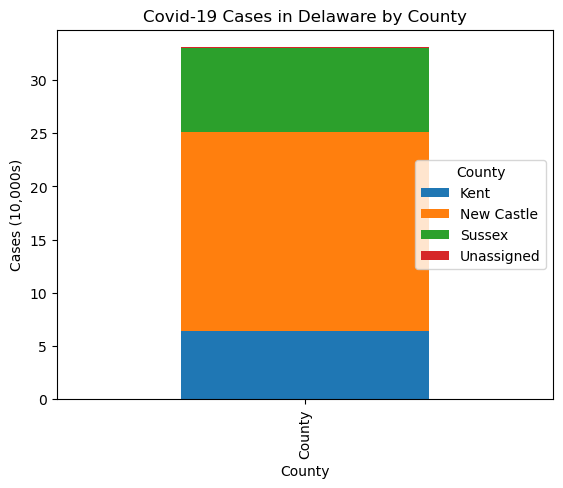

In [163]:
#4

# data from https://allisonhorst.github.io/palmerpenguins/

""" species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show() """

"""
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
"""

def y_formatter(value, position):
    "return the value and tick position"
    return '%1.0f' % (value/10000)

y_format = FuncFormatter(y_formatter)



#Delaware_data.plot.bar(stacked=True)
Delaware_data.plot(kind='bar', stacked=True)
plt.title("Covid-19 Cases in Delaware by County")
plt.xlabel("County")
plt.ylabel("Cases (10,000s)")
ax = plt.gca()
ax.yaxis.set_major_formatter(y_format)
plt.show()





In [182]:
last_column = covid_df.columns[-1]

filtered_covid_df = covid_df[["Province_State", last_column]]
filtered_sum = filtered_covid_df.groupby("Province_State").sum()

filtered_sum = filtered_sum.sort_values(by = last_column, ascending = False)
filtered_sum.columns = ["Total Cases"]
filtered_sum

filtered_covid_df.columns = ["Case Origin", "Cases"]
filtered_covid_df.head()

,Case Origin,Cases
UID,,
84001001,Alabama,19790
84001003,Alabama,69860
84001005,Alabama,7485
84001007,Alabama,8091
84001009,Alabama,18704


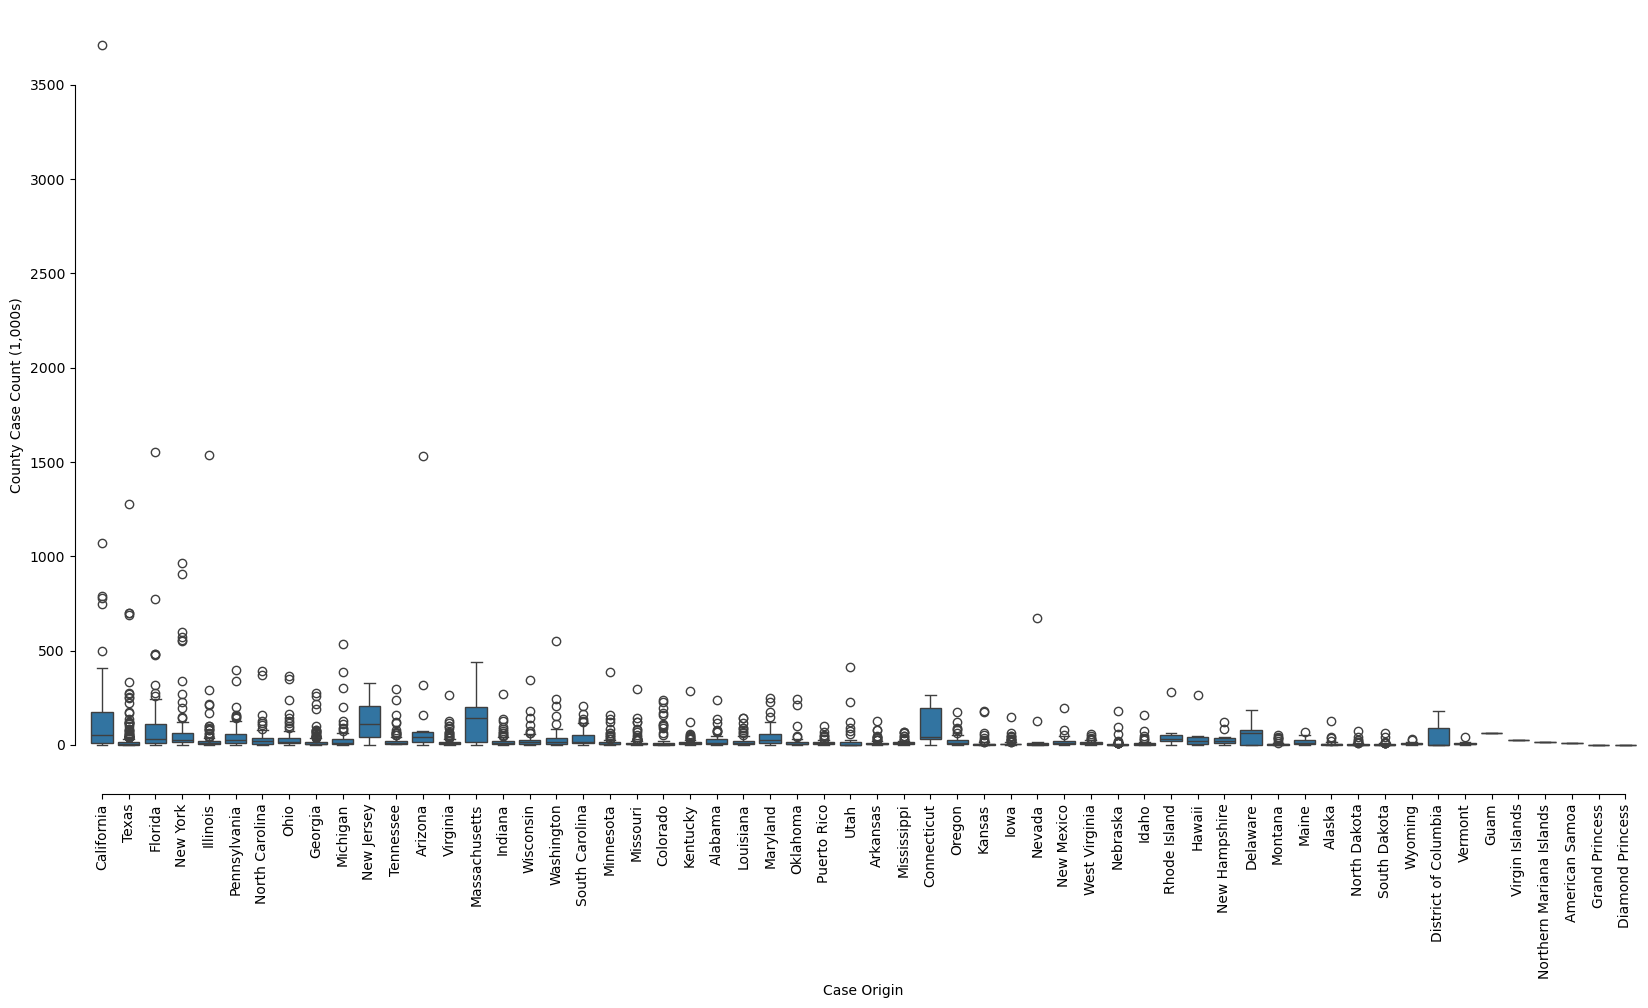

In [197]:
#5
#sns.boxplot(x="day", y="total_bill",
#            hue="smoker", palette=["m", "g"],
#            data=tips)
#sns.despine(offset=10, trim=True)


""" 
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
"""

def y_formatter(value, position):
    "return the value and tick position"
    return '%1.0f' % (value/1000)

y_format = FuncFormatter(y_formatter)

plt.figure(figsize=(20, 10))
sns.boxplot(x = "Case Origin", y = "Cases", data = filtered_covid_df, 
            order = filtered_sum.index)
plt.xlabel("Case Origin")
plt.ylabel("County Case Count (1,000s)")
ax = plt.gca()
ax.yaxis.set_major_formatter(y_format)
ax.xaxis.set_tick_params(rotation = 90)

sns.despine(offset=10, trim = True)
